CONTENT

This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. This contains data over a period of 7 years.

There are total 7385 rows and 12 columns. There are few abbreviations that has been used to describe the features. I am listing them out here. The same can be found in the Data Description sheet.

Model

    4WD/4X4 = Four-wheel drive

    AWD = All-wheel drive

    FFV = Flexible-fuel vehicle

    SWB = Short wheelbase

    LWB = Long wheelbase

    EWB = Extended wheelbase

Transmission

    A = Automatic

    AM = Automated manual

    AS = Automatic with select shift

    AV = Continuously variable

    M = Manual

    3 - 10 = Number of gears

Fuel type

    X = Regular gasoline

    Z = Premium gasoline

    D = Diesel

    E = Ethanol (E85)

    N = Natural gas

Fuel Consumption

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)

CO2 Emissions

The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

### Import the Libraries

We will imported Pandas and Numpy library and then we will open our dataset which is in csv format using the pd.read_csv() method of Pandas. After that we will check the first 5 rows of our dataframe.

In [1]:
#For numerical libraries
import numpy as np

#To handle data in the form of rows and columns
import pandas as pd

#importing ploting libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To enable plotting graphs 
%matplotlib inline

### Data Wrangling

We will imported Pandas and Numpy library and then we will open our dataset which is in csv format using the pd.read_csv() method of Pandas. After that we will check the first 5 rows of our dataframe.

In [2]:
df = pd.read_csv("FuelConsumption_n.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


In [3]:
#information is about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MODELYEAR             1067 non-null   int64  
 1   MAKE                  1067 non-null   object 
 2   MODEL                 1067 non-null   object 
 3   VEHICLECLASS          1067 non-null   object 
 4   ENGINESIZE            1067 non-null   float64
 5   CYLINDERS             1067 non-null   int64  
 6   TRANSMISSION          1067 non-null   object 
 7   FUELTYPE              1067 non-null   object 
 8   FUELCONSUMPTION_CITY  1067 non-null   float64
 9   FUELCONSUMPTION_HWY   1067 non-null   float64
 10  FUELCONSUMPTION_COMB  1067 non-null   float64
 11  CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 100.2+ KB


In [4]:
#checking the missing values
df.isnull().sum()

MODELYEAR               0
MAKE                    0
MODEL                   0
VEHICLECLASS            0
ENGINESIZE              0
CYLINDERS               0
TRANSMISSION            0
FUELTYPE                0
FUELCONSUMPTION_CITY    0
FUELCONSUMPTION_HWY     0
FUELCONSUMPTION_COMB    0
CO2EMISSIONS            0
dtype: int64

### Exploratory Data Analysis & Visualizations

We will now employ the use of df.describe() method, which will compute the basic statistics for all continuous variables.

The result will contain the following things:

    * the count or frequency.

    * the mean or average.

    * the standard deviation (std).

    * the minimum value

    * the IQR (Interquartile Range: 25%, 50% and 75%)

    * the maximum value

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,488.000000


After that we will now use df.describe() method with an additional argument in it " include = 'all' " , which will compute the basic statistics for all continuous variables as well as some statistics for the categorical variables.

We will have few additional things:

    * The number of unique values (unique)
    
    * The most frequent value (top)
    
    * The frequency of the top element (freq)

In [6]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,294.000000


### Correlation

A mutual interdependence between two or more things is known as __correlation__.

We will now check the __Correlation__ between the continuous variables using the __df.corr()__ method.

In [7]:
df_corr = df.corr()
df_corr

C:\Users\Test\AppData\Local\Temp\ipykernel_15176\1378791828.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,0.892129
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,1.000000


Now, in this code snippet, we will get the names of only those columns whose absolute value is correlated to CO2EMISSIONS by greater than 50%.

In [8]:
corr_cols = df_corr[abs(df_corr['CO2EMISSIONS']) > 0.5].index.tolist()
corr_cols

['ENGINESIZE',
 'CYLINDERS',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'CO2EMISSIONS']

### Heat Map

We will draw the heatmap of the important columns below.

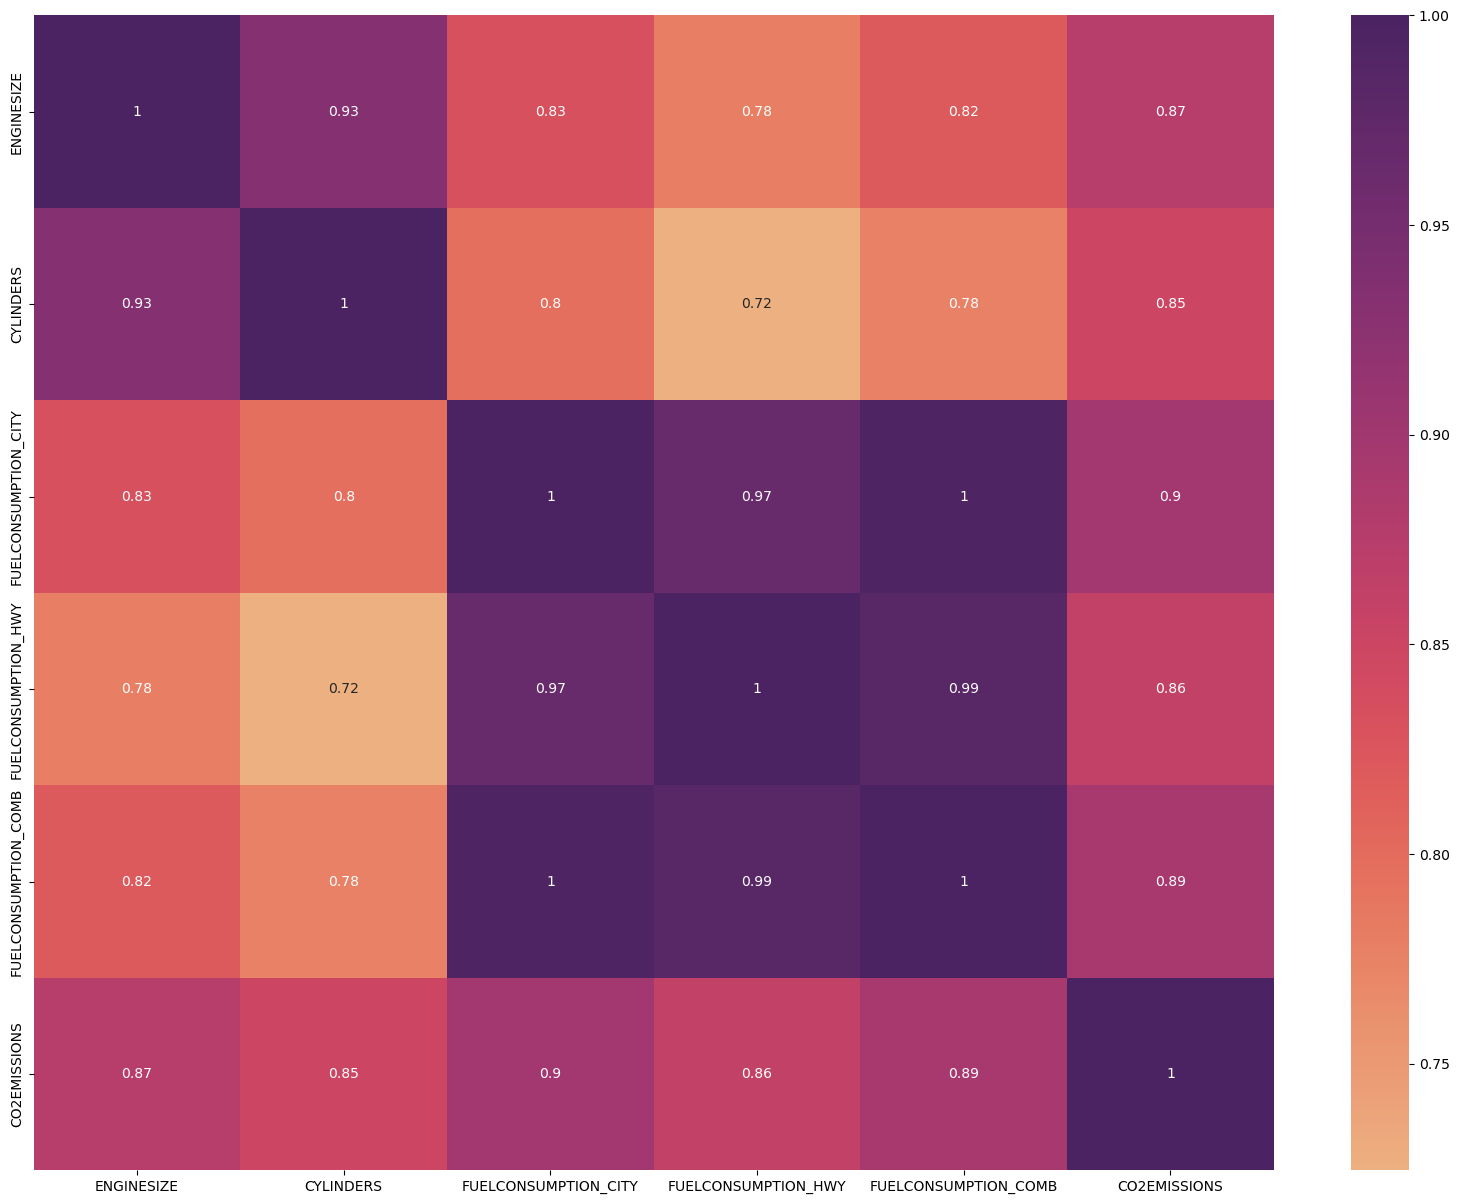

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='flare');

### CO2 Emissions

In order to gain a better understanding of the feature of interest, it is important to investigate the relationships and dependencies between CO2 Emissions and other features in the dataset. This will help us identify potential factors that influence CO2 Emissions and allow us to make more informed conclusions about the data.

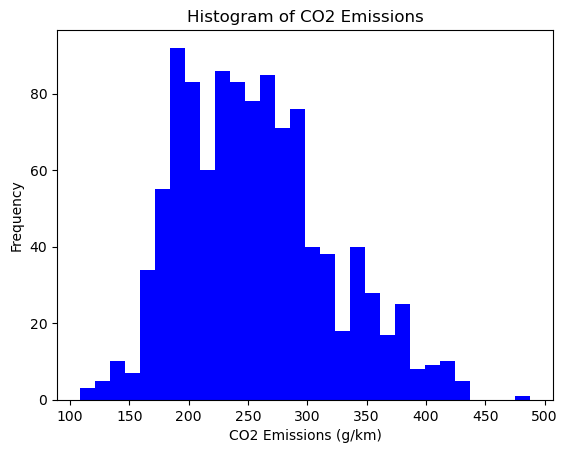

In [10]:
#Plot the distribution of CO2 Emissions
plt.hist(df['CO2EMISSIONS'], bins=30, color='b')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.title('Histogram of CO2 Emissions')
plt.show()

We can conclude from the histogram of CO2 Emissions, that the majority of the data points fall within the range of 180 to 300 grams per kilometer. This range has the highest frequency of data points, which means that most cars have emissions within this range.

### Boxplot for Outliers

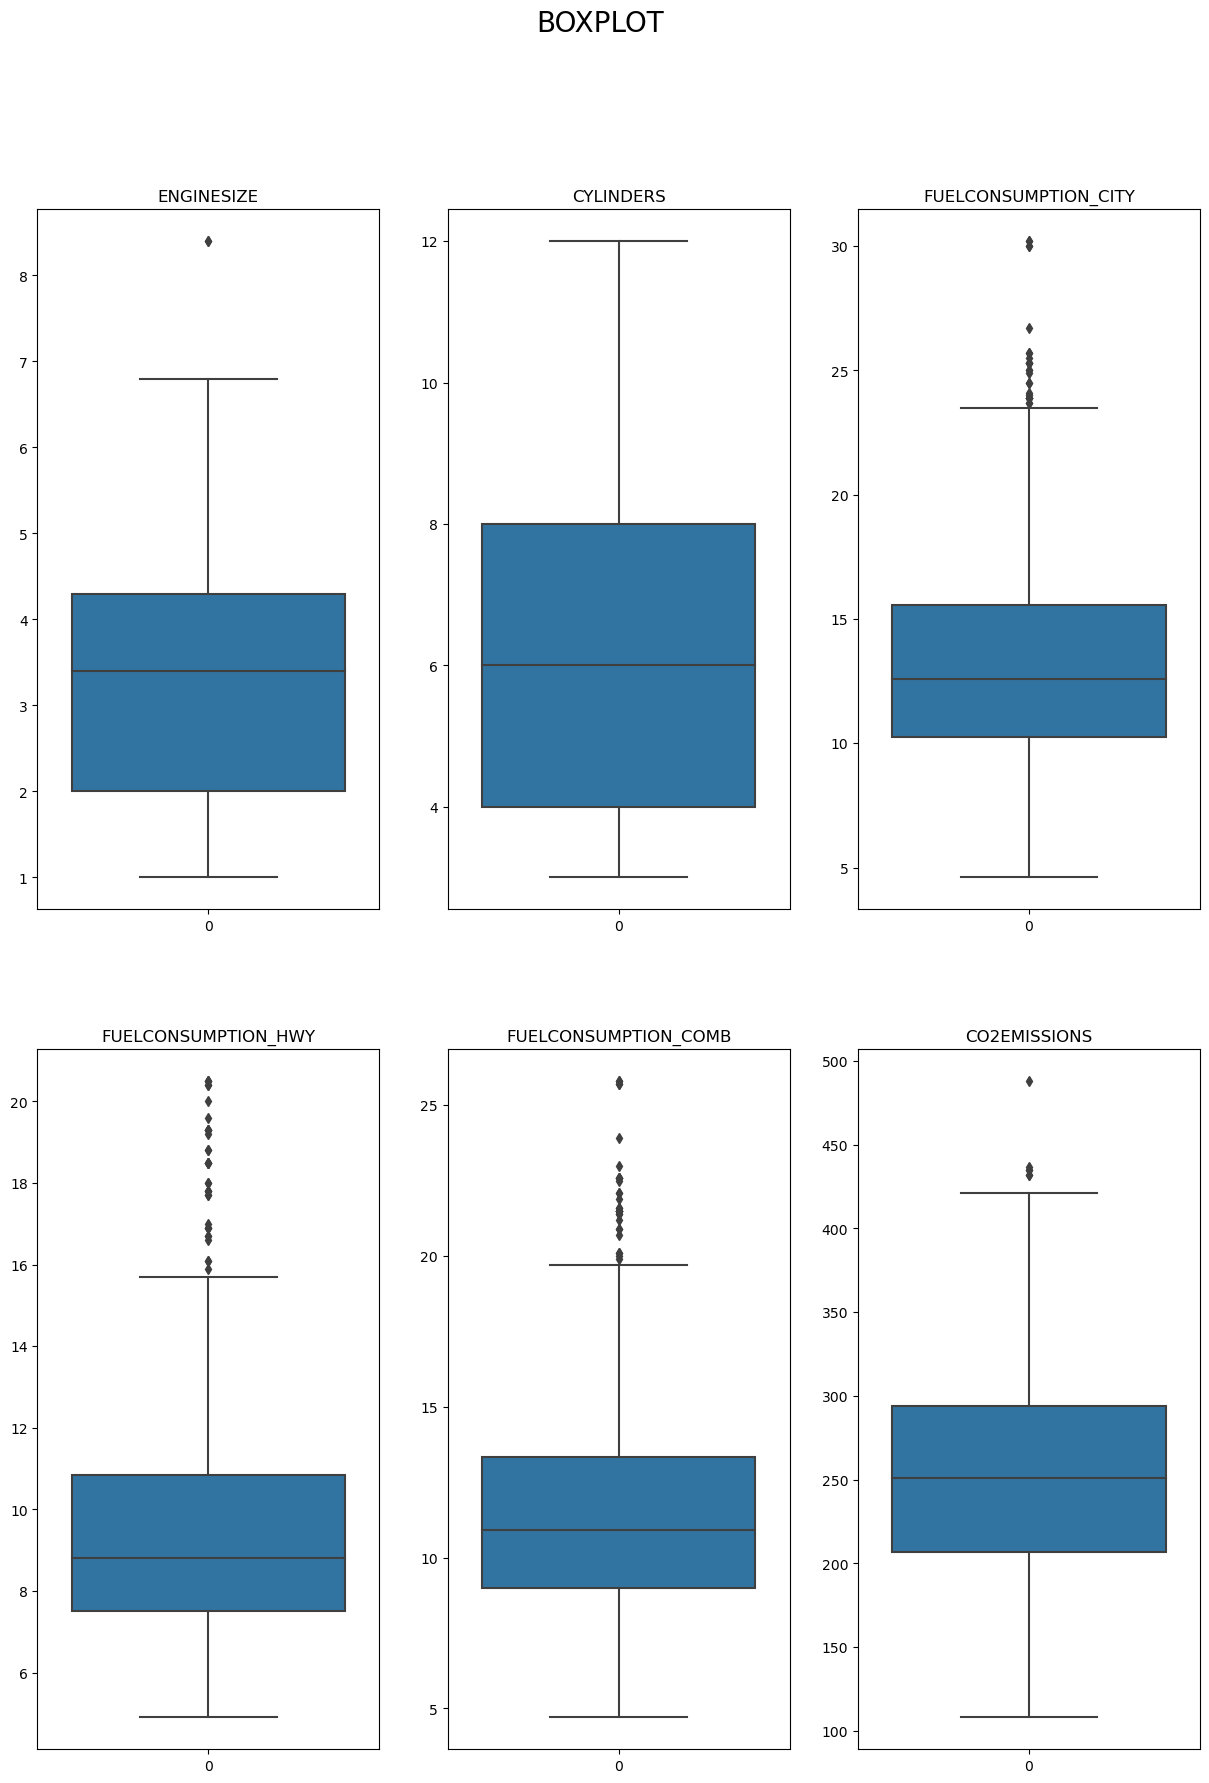

In [11]:
plt.figure(figsize = (15,20))
plt.subplot(2,3,1)
sns.boxplot(df['ENGINESIZE'])
plt.title('ENGINESIZE')
plt.subplot(2,3,2)
sns.boxplot(df['CYLINDERS'])
plt.title('CYLINDERS')
plt.subplot(2,3,3)
sns.boxplot(df['FUELCONSUMPTION_CITY'])
plt.title('FUELCONSUMPTION_CITY')
plt.subplot(2,3,4)
sns.boxplot(df['FUELCONSUMPTION_HWY'])
plt.title('FUELCONSUMPTION_HWY')
plt.subplot(2,3,5)
sns.boxplot(df['FUELCONSUMPTION_COMB'])
plt.title('FUELCONSUMPTION_COMB')
plt.subplot(2,3,6)
sns.boxplot(df['CO2EMISSIONS'])
plt.title('CO2EMISSIONS')
plt.suptitle("BOXPLOT", fontsize = 20)
plt.show()

In [12]:
df["ENGINESIZE"].median()

3.4

The median engine size is 3.4 liters.

This means that half of the vehicles have an engine size larger than 3.4 liters

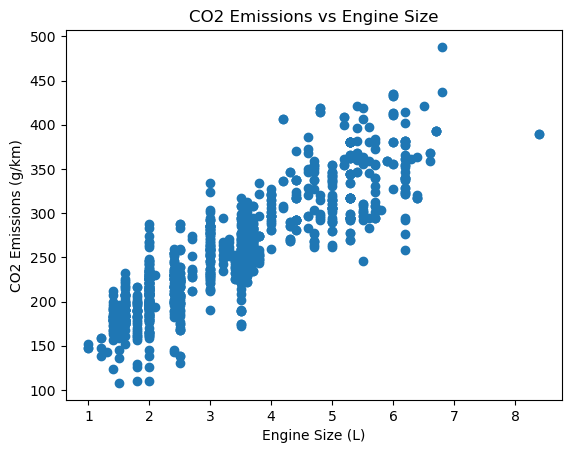

In [13]:
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'])
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('CO2 Emissions vs Engine Size')
plt.show()

From the Correlation plot described above Correlation between engine size and CO2 emissions: 0.874154. Hence, this indicates that larger engines tend to produce more CO2 emissions.

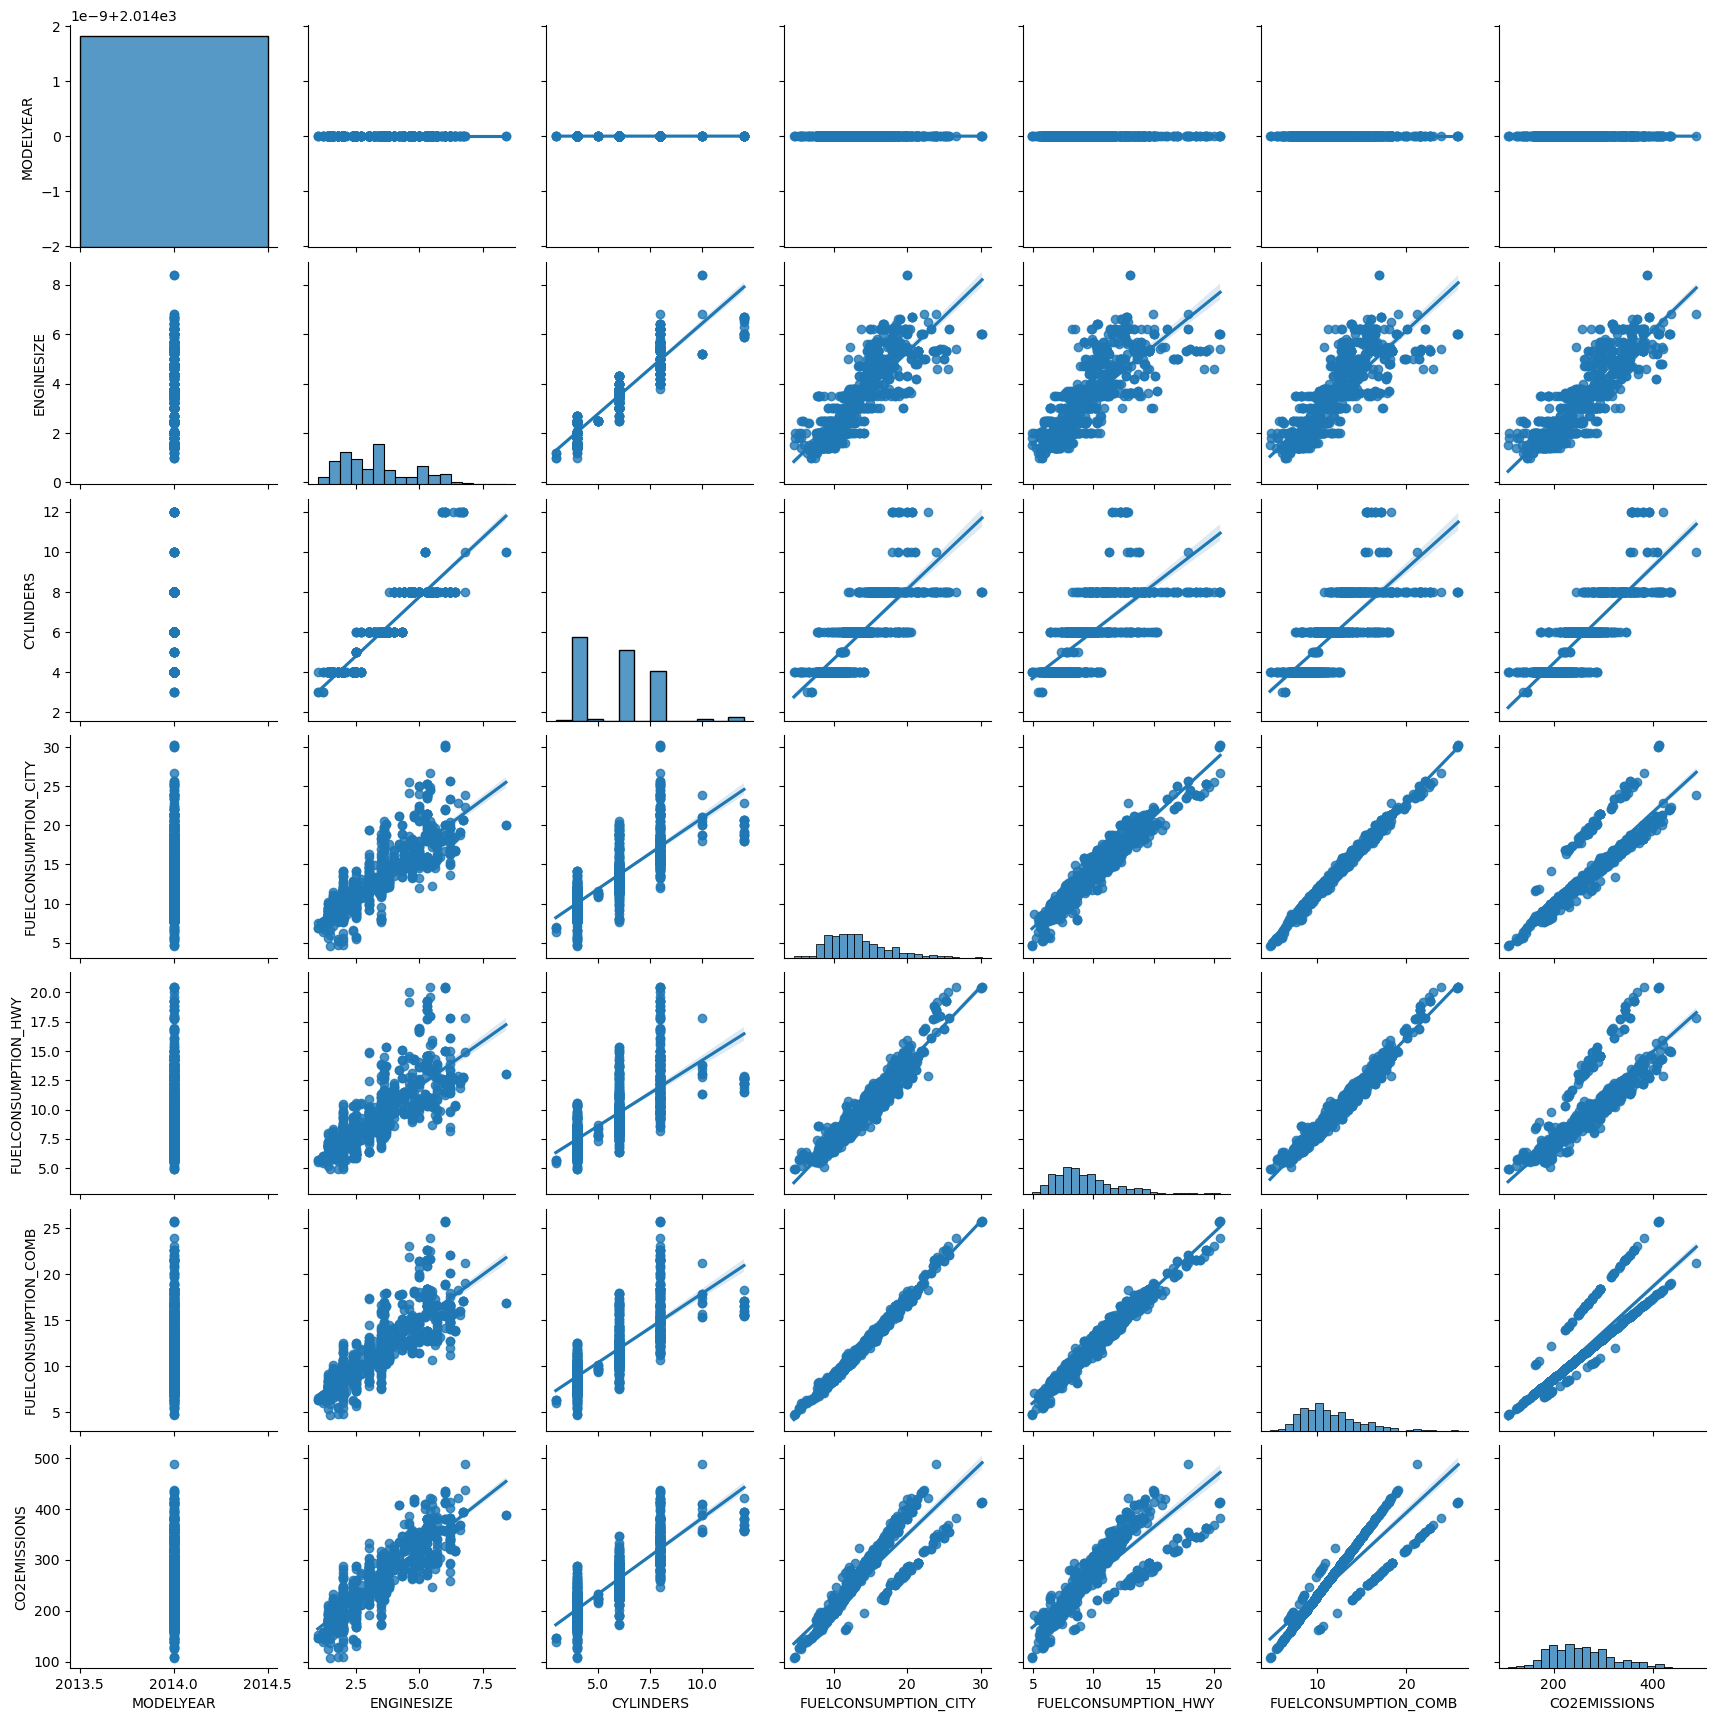

In [14]:
sns.pairplot(df, kind="reg")
plt.show()

Comparing them with the CO2EMISSIONS which is the last row, we can see that:

'MODELYEAR' has got no impact on the said column.

'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY'  are having a strong positive correlation i.e. 0.874154,0.849685,0.898039,0.861748 respectively

We will 'FUELCONSUMPTION_COMB' into account which is the combination of both highway and city fuel consumption. Correlation between 'FUELCONSUMPTION_COMB' and CO2EMISSIONS is 0.892129

### CO2 Emissions with Fuel Consumption Comb

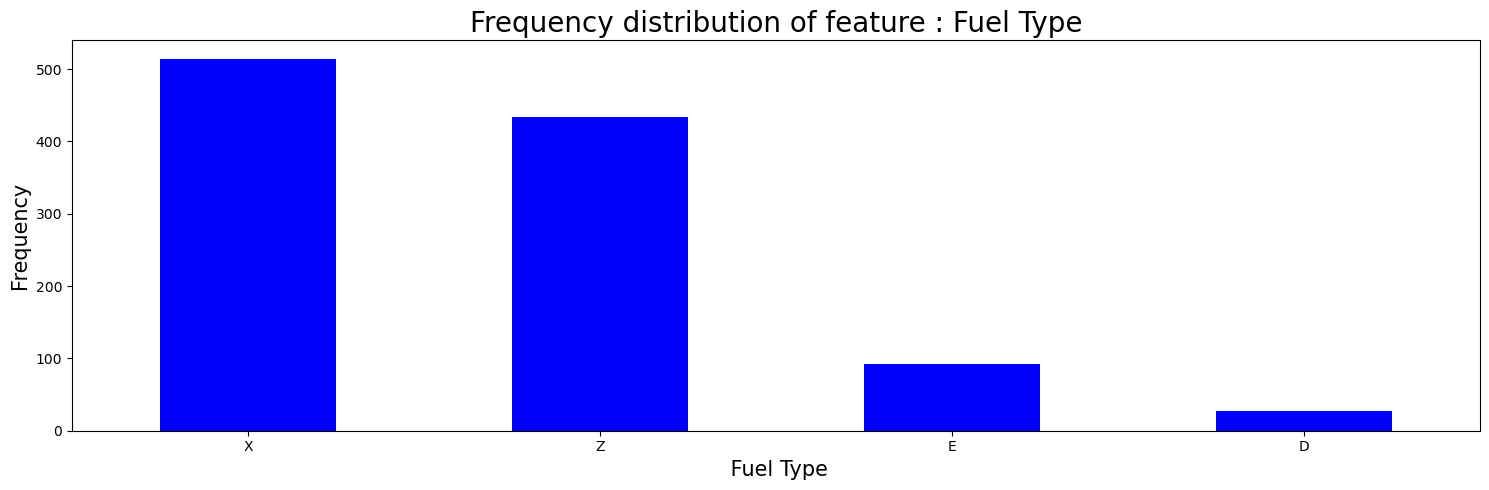

In [15]:
plt.figure(figsize=(15,5));
df.groupby("FUELTYPE")["FUELTYPE"].count().sort_values(ascending=False).plot(kind="bar", color='b')

plt.title("Frequency distribution of feature : Fuel Type", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel(" Fuel Type", fontsize=15)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Car which runs on Gasoline let it be X or Z is the most common vehicle type.

In [16]:
fuel_type_avg = df.groupby("FUELTYPE")[["FUELCONSUMPTION_COMB"]].mean().round(2).sort_values(by = "FUELCONSUMPTION_COMB", ascending = False)
fuel_type_avg

,FUELCONSUMPTION_COMB
FUELTYPE,
E,18.19
Z,11.68
X,10.48
D,8.44


Average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)

In [17]:
highest_co2_fuel = df.groupby("FUELTYPE")["CO2EMISSIONS"].mean().sort_values(ascending=False)
highest_co2_fuel

FUELTYPE
E    291.086957
Z    268.529954
X    241.097276
D    227.777778
Name: CO2EMISSIONS, dtype: float64

The resulting series shows that the fuel type with the highest CO2 emissions is ethanol (E), with an average of 291.08 g/km

### CO2 Emissions with Vehicle Class

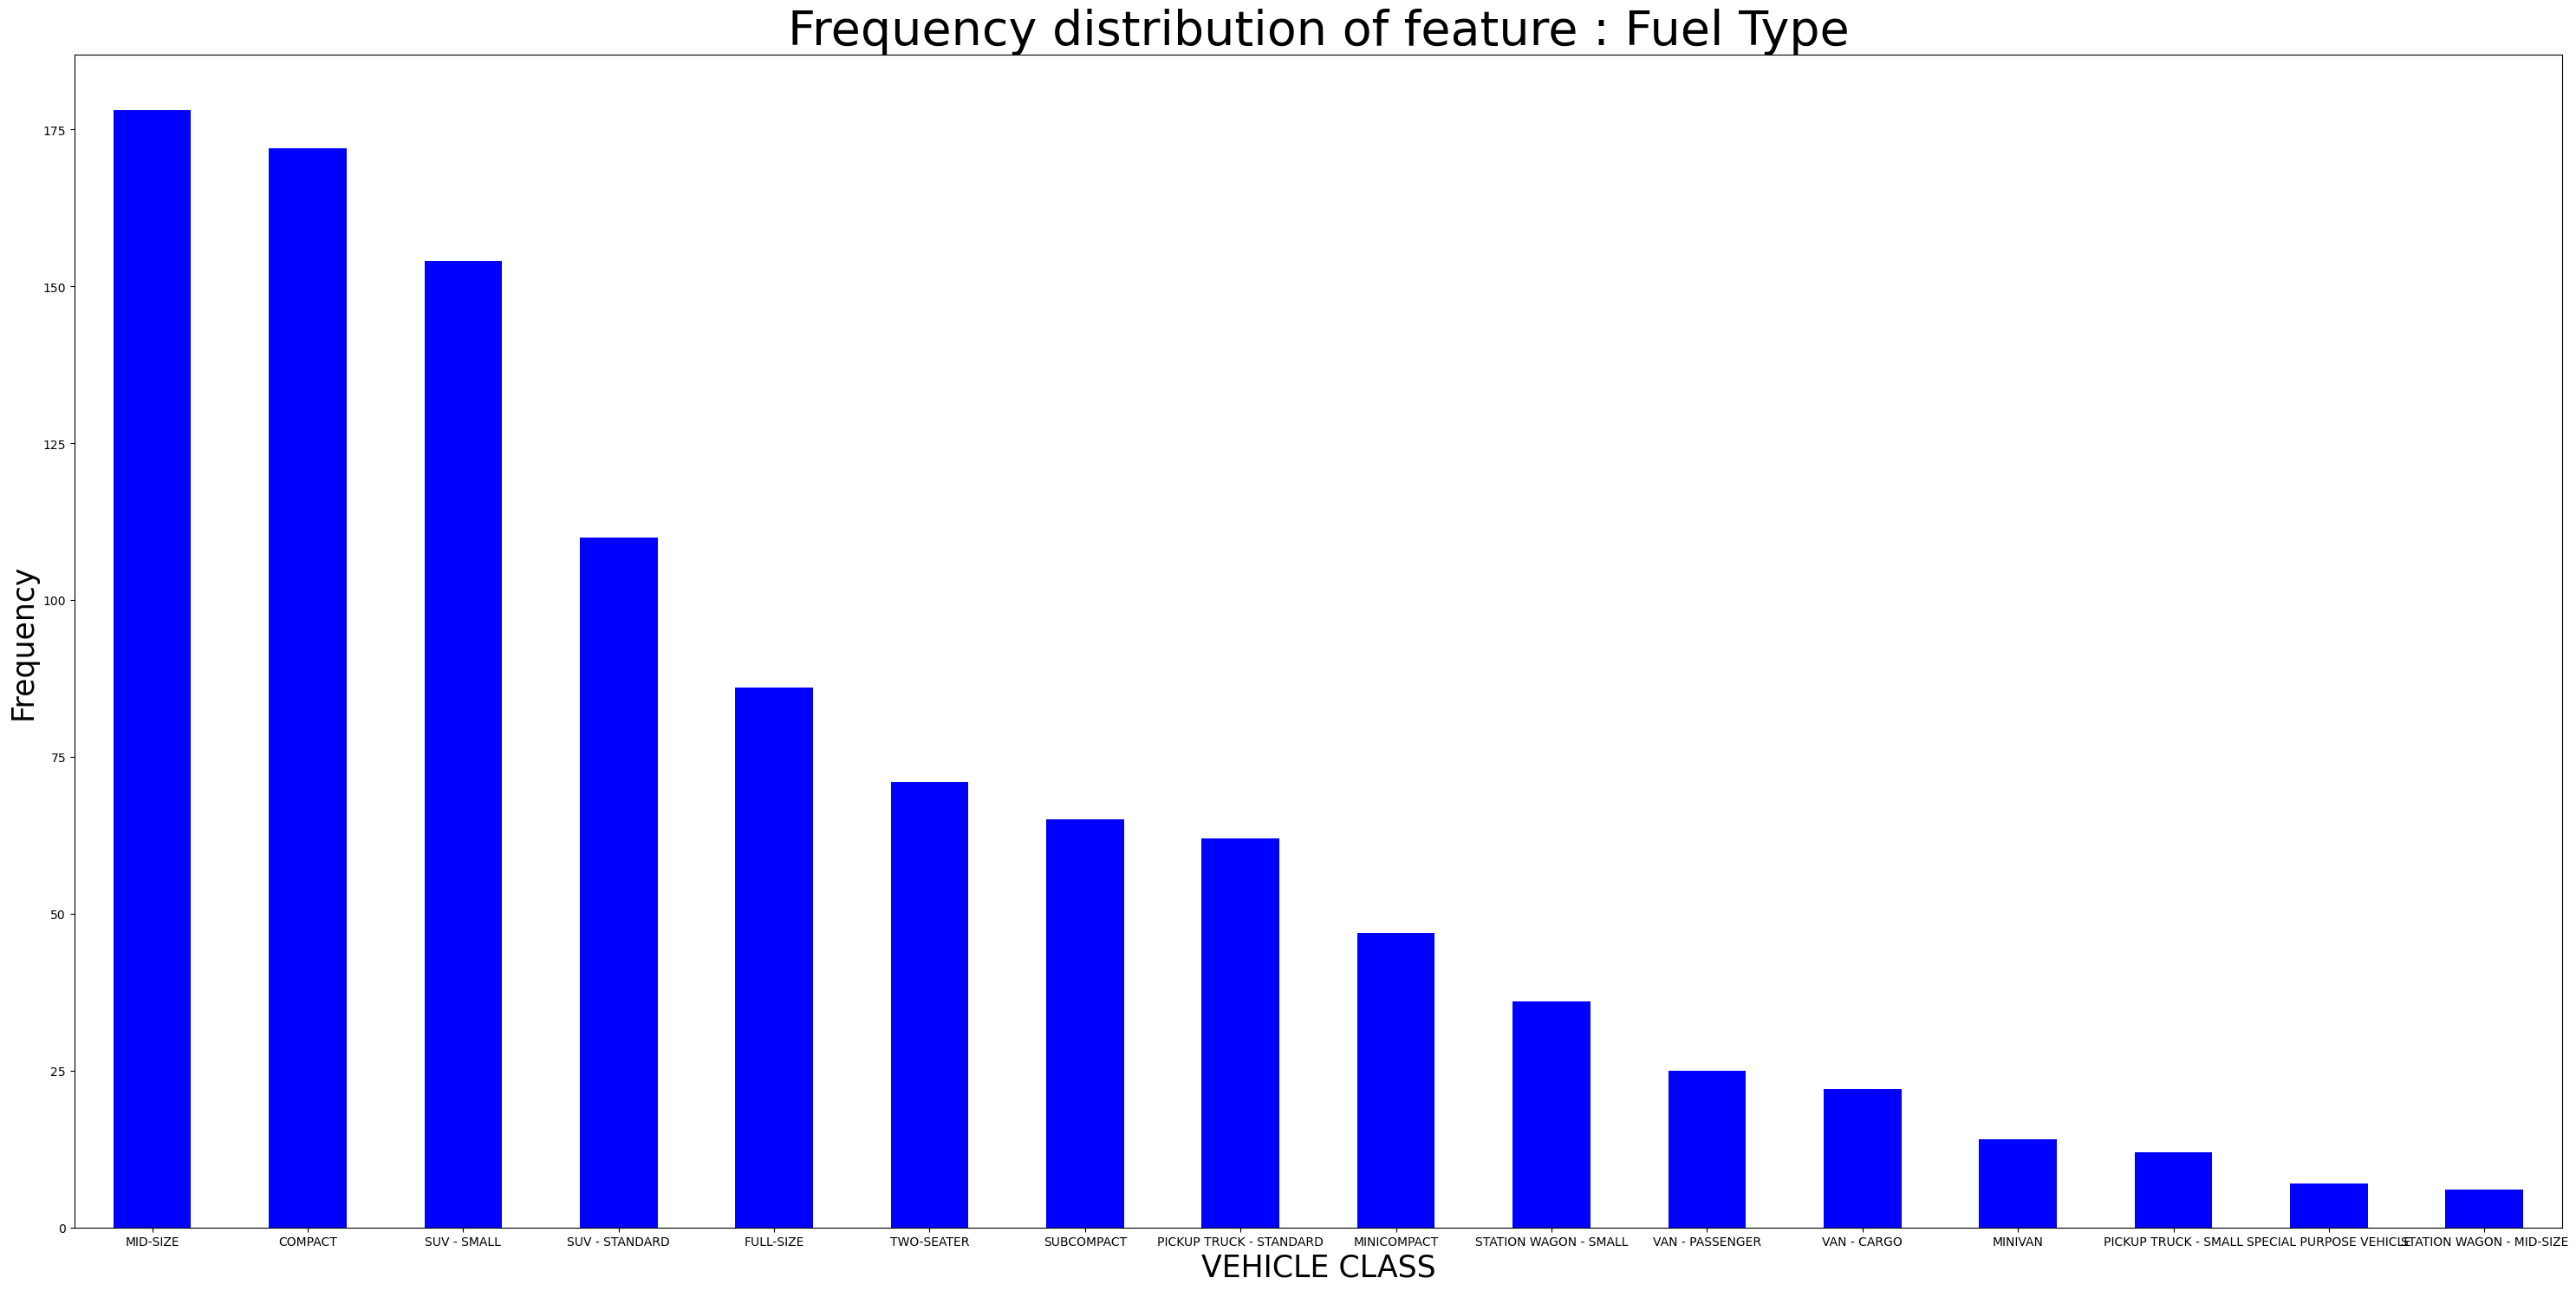

In [18]:
plt.figure(figsize=(30,15));
df.groupby("VEHICLECLASS")["VEHICLECLASS"].count().sort_values(ascending=False).plot(kind="bar", color='b')

plt.title("Frequency distribution of feature : Fuel Type", fontsize=40)
plt.ylabel("Frequency", fontsize=25)
plt.xlabel("VEHICLE CLASS", fontsize=25)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

MID-SIZE, COMPACT, SUV - SMALL vehicles are the most frequent ones on roads

In [19]:
#average CO2 emissions for all vehicles
round(df['CO2EMISSIONS'].mean(),2)

256.23

The average CO2 emissions for all vehicle is 250.23 g/Km

In [20]:
#average CO2 emissions for each vehicle
all_veh_avr_co2 = df.groupby("VEHICLECLASS")["CO2EMISSIONS"].mean()
all_veh_avr_co2

VEHICLECLASS
COMPACT                     216.715116
FULL-SIZE                   267.651163
MID-SIZE                    226.483146
MINICOMPACT                 235.553191
MINIVAN                     260.142857
PICKUP TRUCK - SMALL        284.250000
PICKUP TRUCK - STANDARD     309.096774
SPECIAL PURPOSE VEHICLE     235.285714
STATION WAGON - MID-SIZE    235.666667
STATION WAGON - SMALL       221.111111
SUBCOMPACT                  252.615385
SUV - SMALL                 242.694805
SUV - STANDARD              307.672727
TWO-SEATER                  265.676056
VAN - CARGO                 361.500000
VAN - PASSENGER             401.000000
Name: CO2EMISSIONS, dtype: float64

In [21]:
# average CO2 emissions for vehicles with an engine size of 2.0 liters or smaller?
Eng_size_sml = df[df['ENGINESIZE'] <= 2.0]
Eng_size_sml['CO2EMISSIONS'].mean().round(2)

194.7

In [22]:
all_veh_avr_sml_co2 = Eng_size_sml.groupby("VEHICLECLASS")["CO2EMISSIONS"].mean()
all_veh_avr_sml_co2

VEHICLECLASS
COMPACT                     191.230769
FULL-SIZE                   201.750000
MID-SIZE                    187.750000
MINICOMPACT                 183.210526
SPECIAL PURPOSE VEHICLE     224.750000
STATION WAGON - MID-SIZE    184.000000
STATION WAGON - SMALL       195.695652
SUBCOMPACT                  193.416667
SUV - SMALL                 218.692308
SUV - STANDARD              235.000000
TWO-SEATER                  190.000000
Name: CO2EMISSIONS, dtype: float64

### Cylinders

<Axes: title={'center': 'Frequency distribution of feature :Cylinders'}>

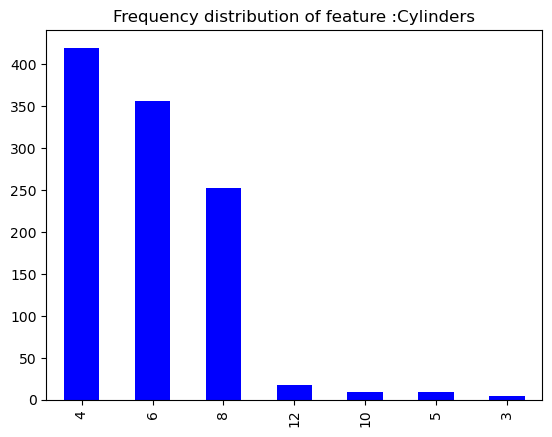

In [23]:
df['CYLINDERS'].value_counts().plot(kind = 'bar',title="Frequency distribution of feature :Cylinders", color='b')

Most of the cars have 4 and 6 cylinders.

Text(0, 0.5, 'CO2 Emissions(g/km)')

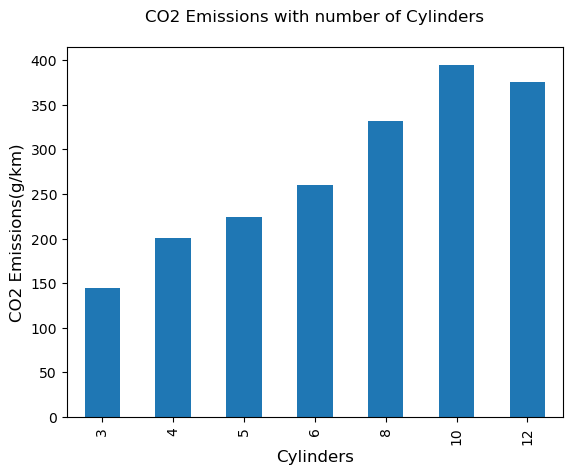

In [24]:
co2_cylinder = df.groupby('CYLINDERS')["CO2EMISSIONS"].mean()
co2_cylinder.plot(kind = 'bar',title="CO2 Emissions with number of Cylinders\n")
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

In [25]:
co2_cylinder

CYLINDERS
3     144.750000
4     201.107143
5     223.888889
6     260.603933
8     331.869048
10    394.777778
12    375.176471
Name: CO2EMISSIONS, dtype: float64

Vehicles with smaller cylinders have low CO2 emission rates.

### Make and Model

<Axes: title={'center': 'Frequency distribution of feature :Make'}>

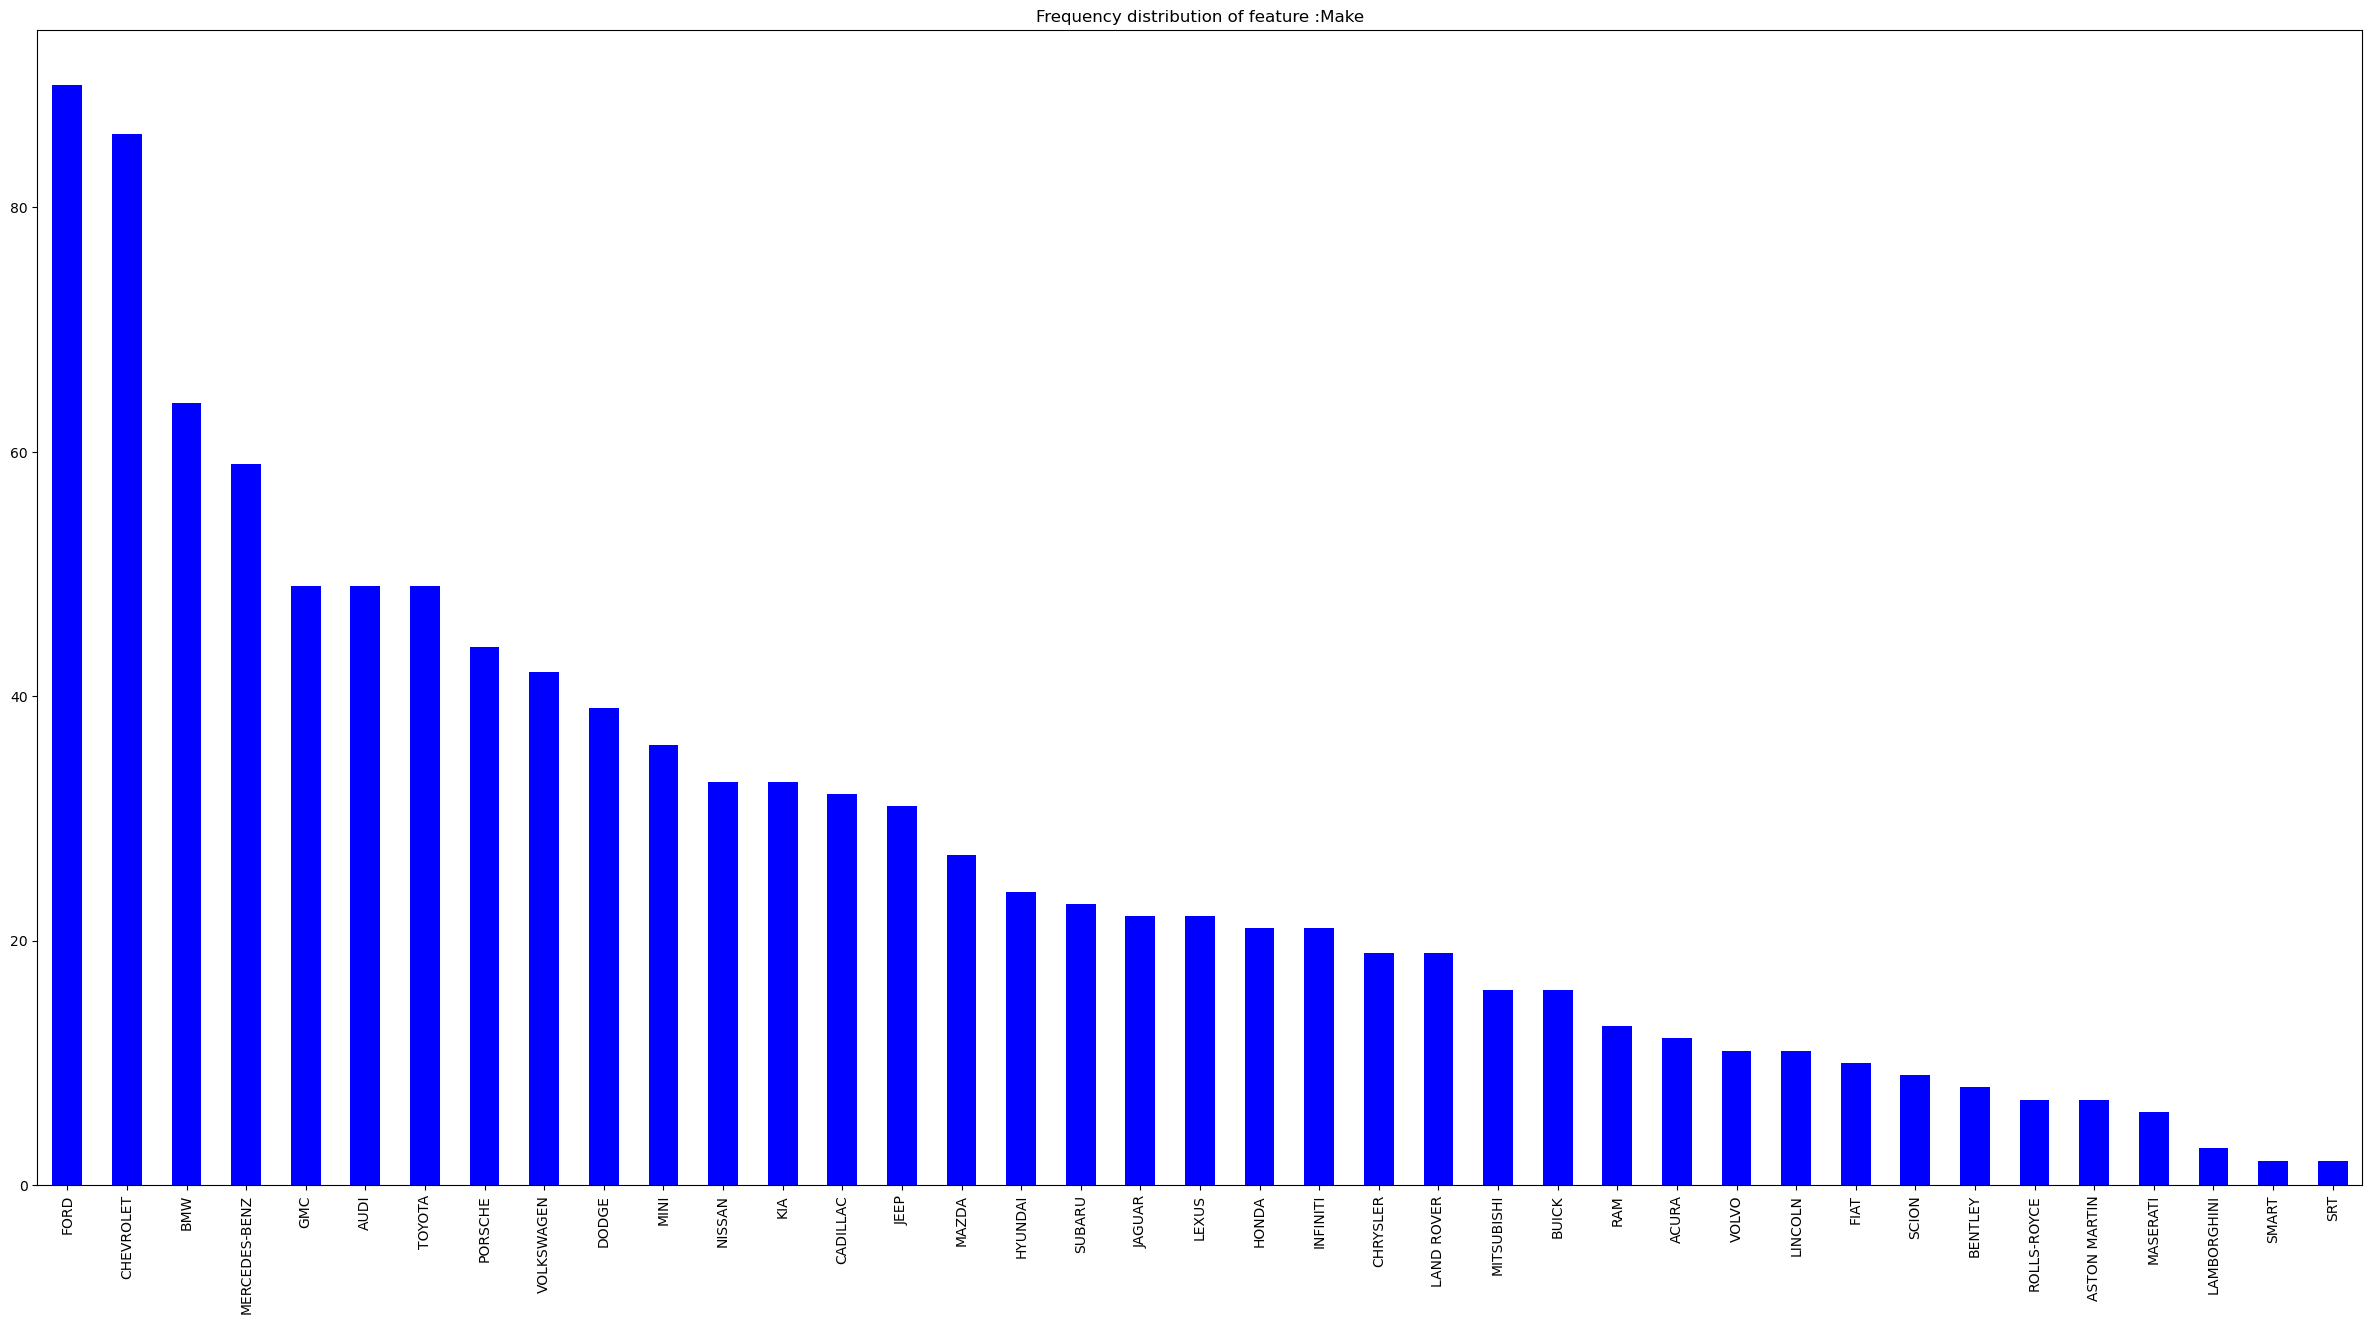

In [26]:
plt.figure(figsize=(30,15));
df["MAKE"].value_counts().plot(kind='bar', title="Frequency distribution of feature :Make", color='b')

Out of the 39 car brands Ford,Chevrolet and BMW are the most dominating.

<Axes: title={'center': 'Frequency distribution of feature :Model'}>

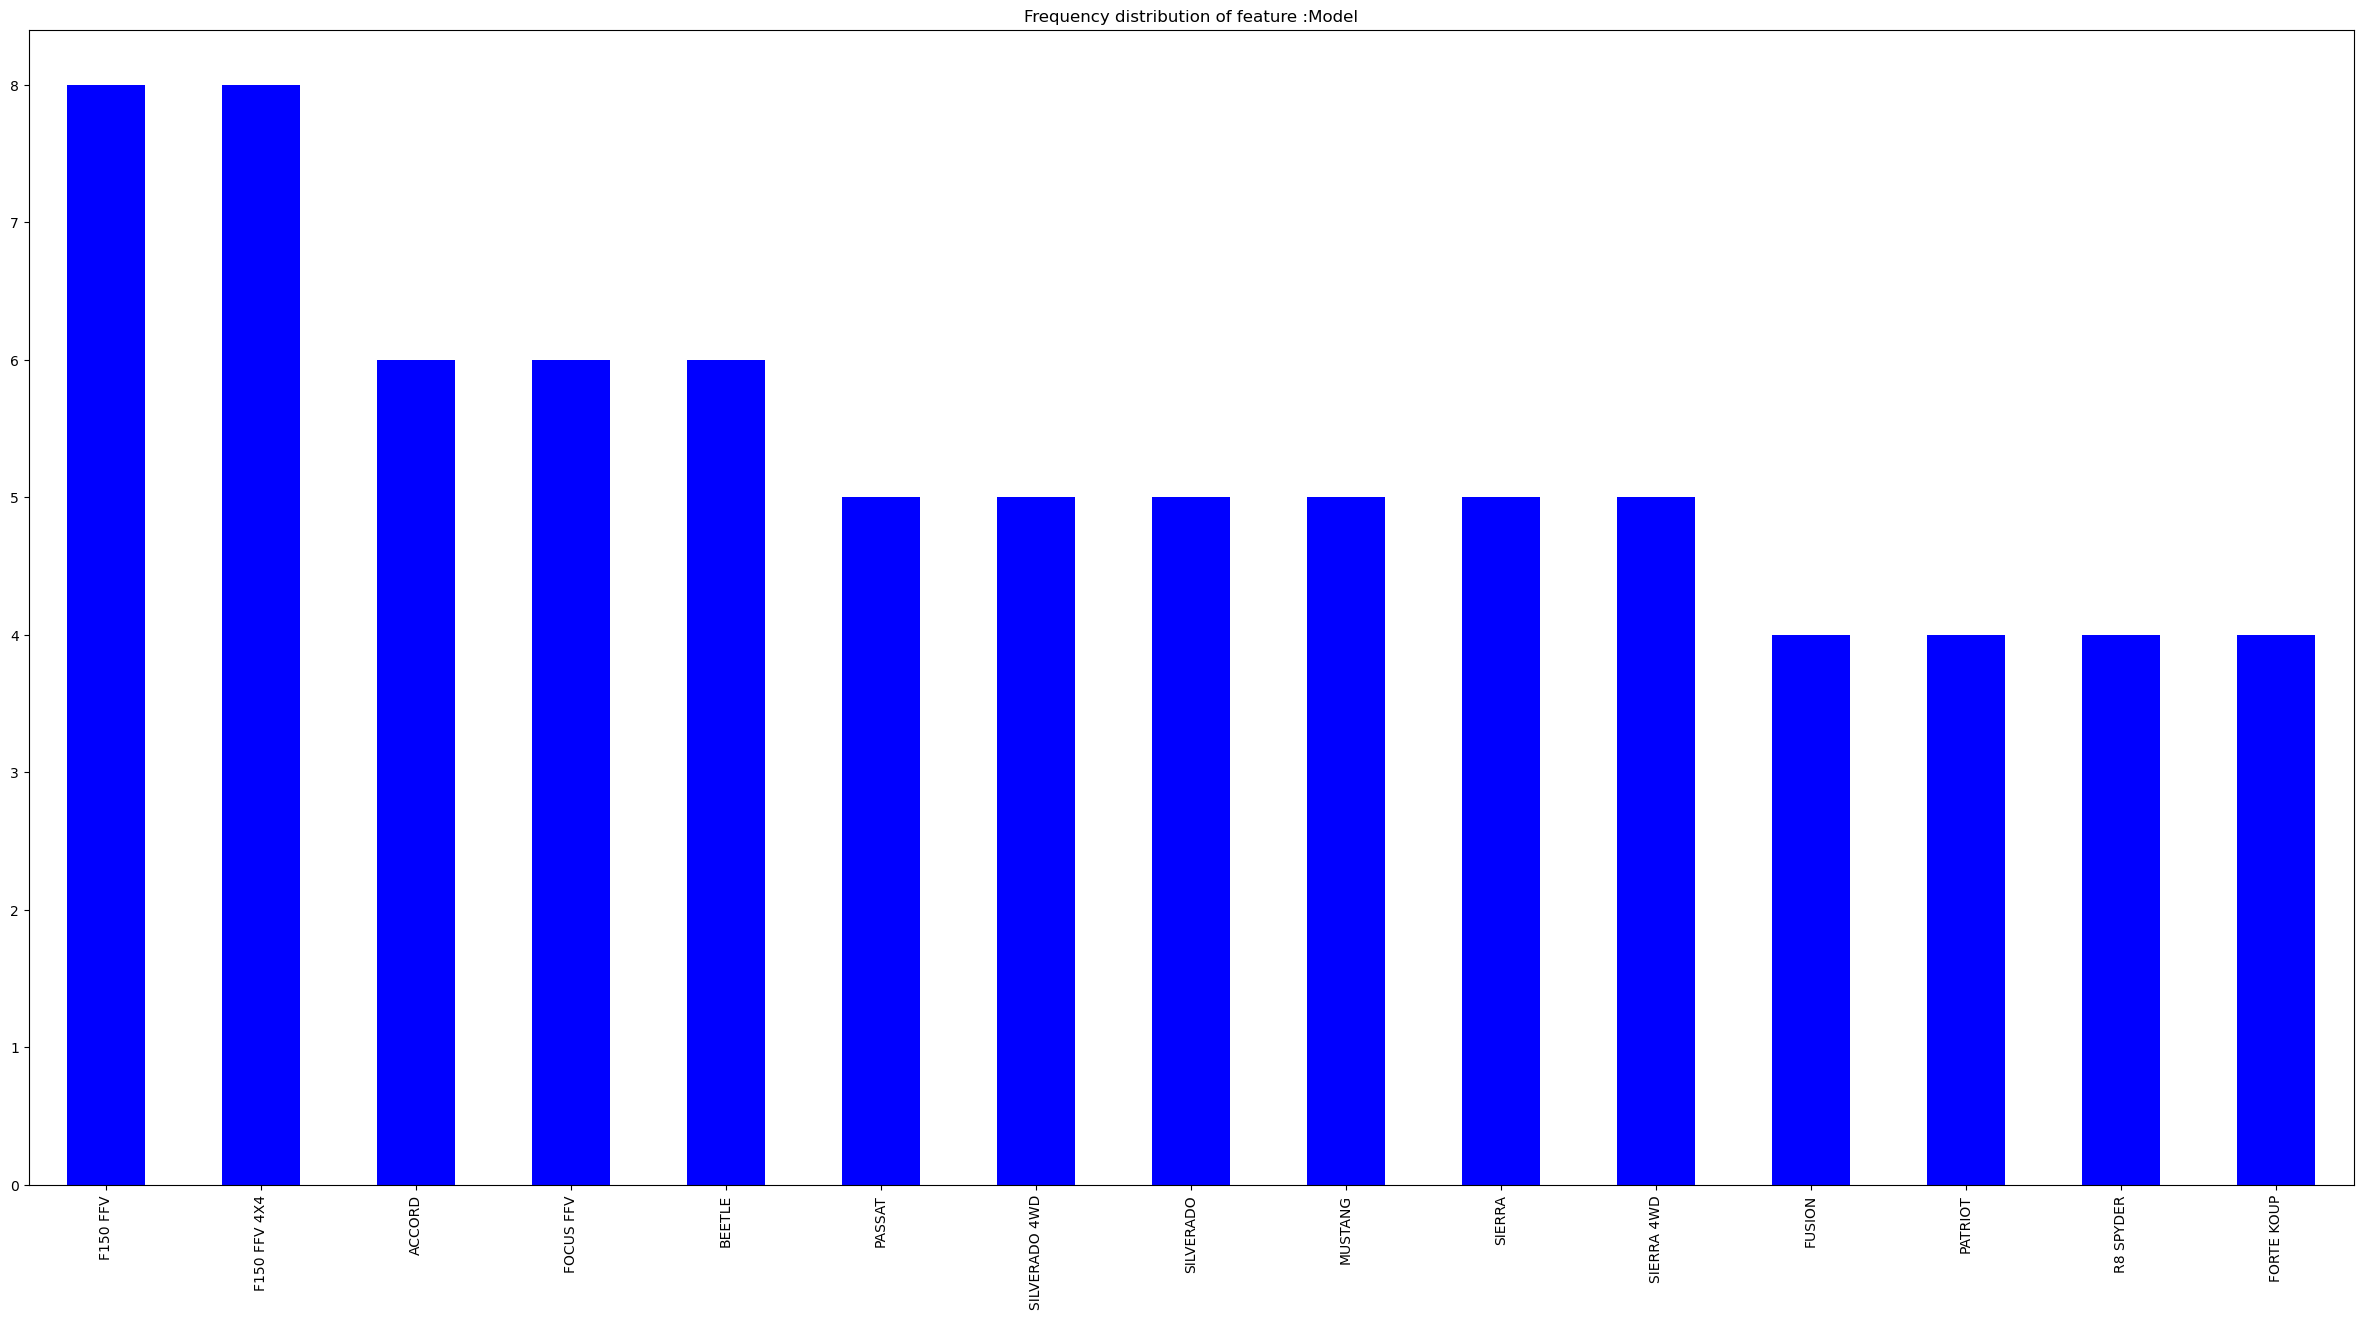

In [27]:
plt.figure(figsize=(30,15));
df["MODEL"].value_counts().head(15).plot(kind='bar', title="Frequency distribution of feature :Model", color='b')

### Transmission

In [28]:
df["TRANSMISSION"].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'A6', 'AM7', 'AV8', 'AS8', 'A7', 'A8',
       'M7', 'A4', 'M5', 'AV', 'A5', 'AM6', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5'], dtype=object)

The 23 type of transmission has been clubed into 5 different transmission without taking the number of clutches into account

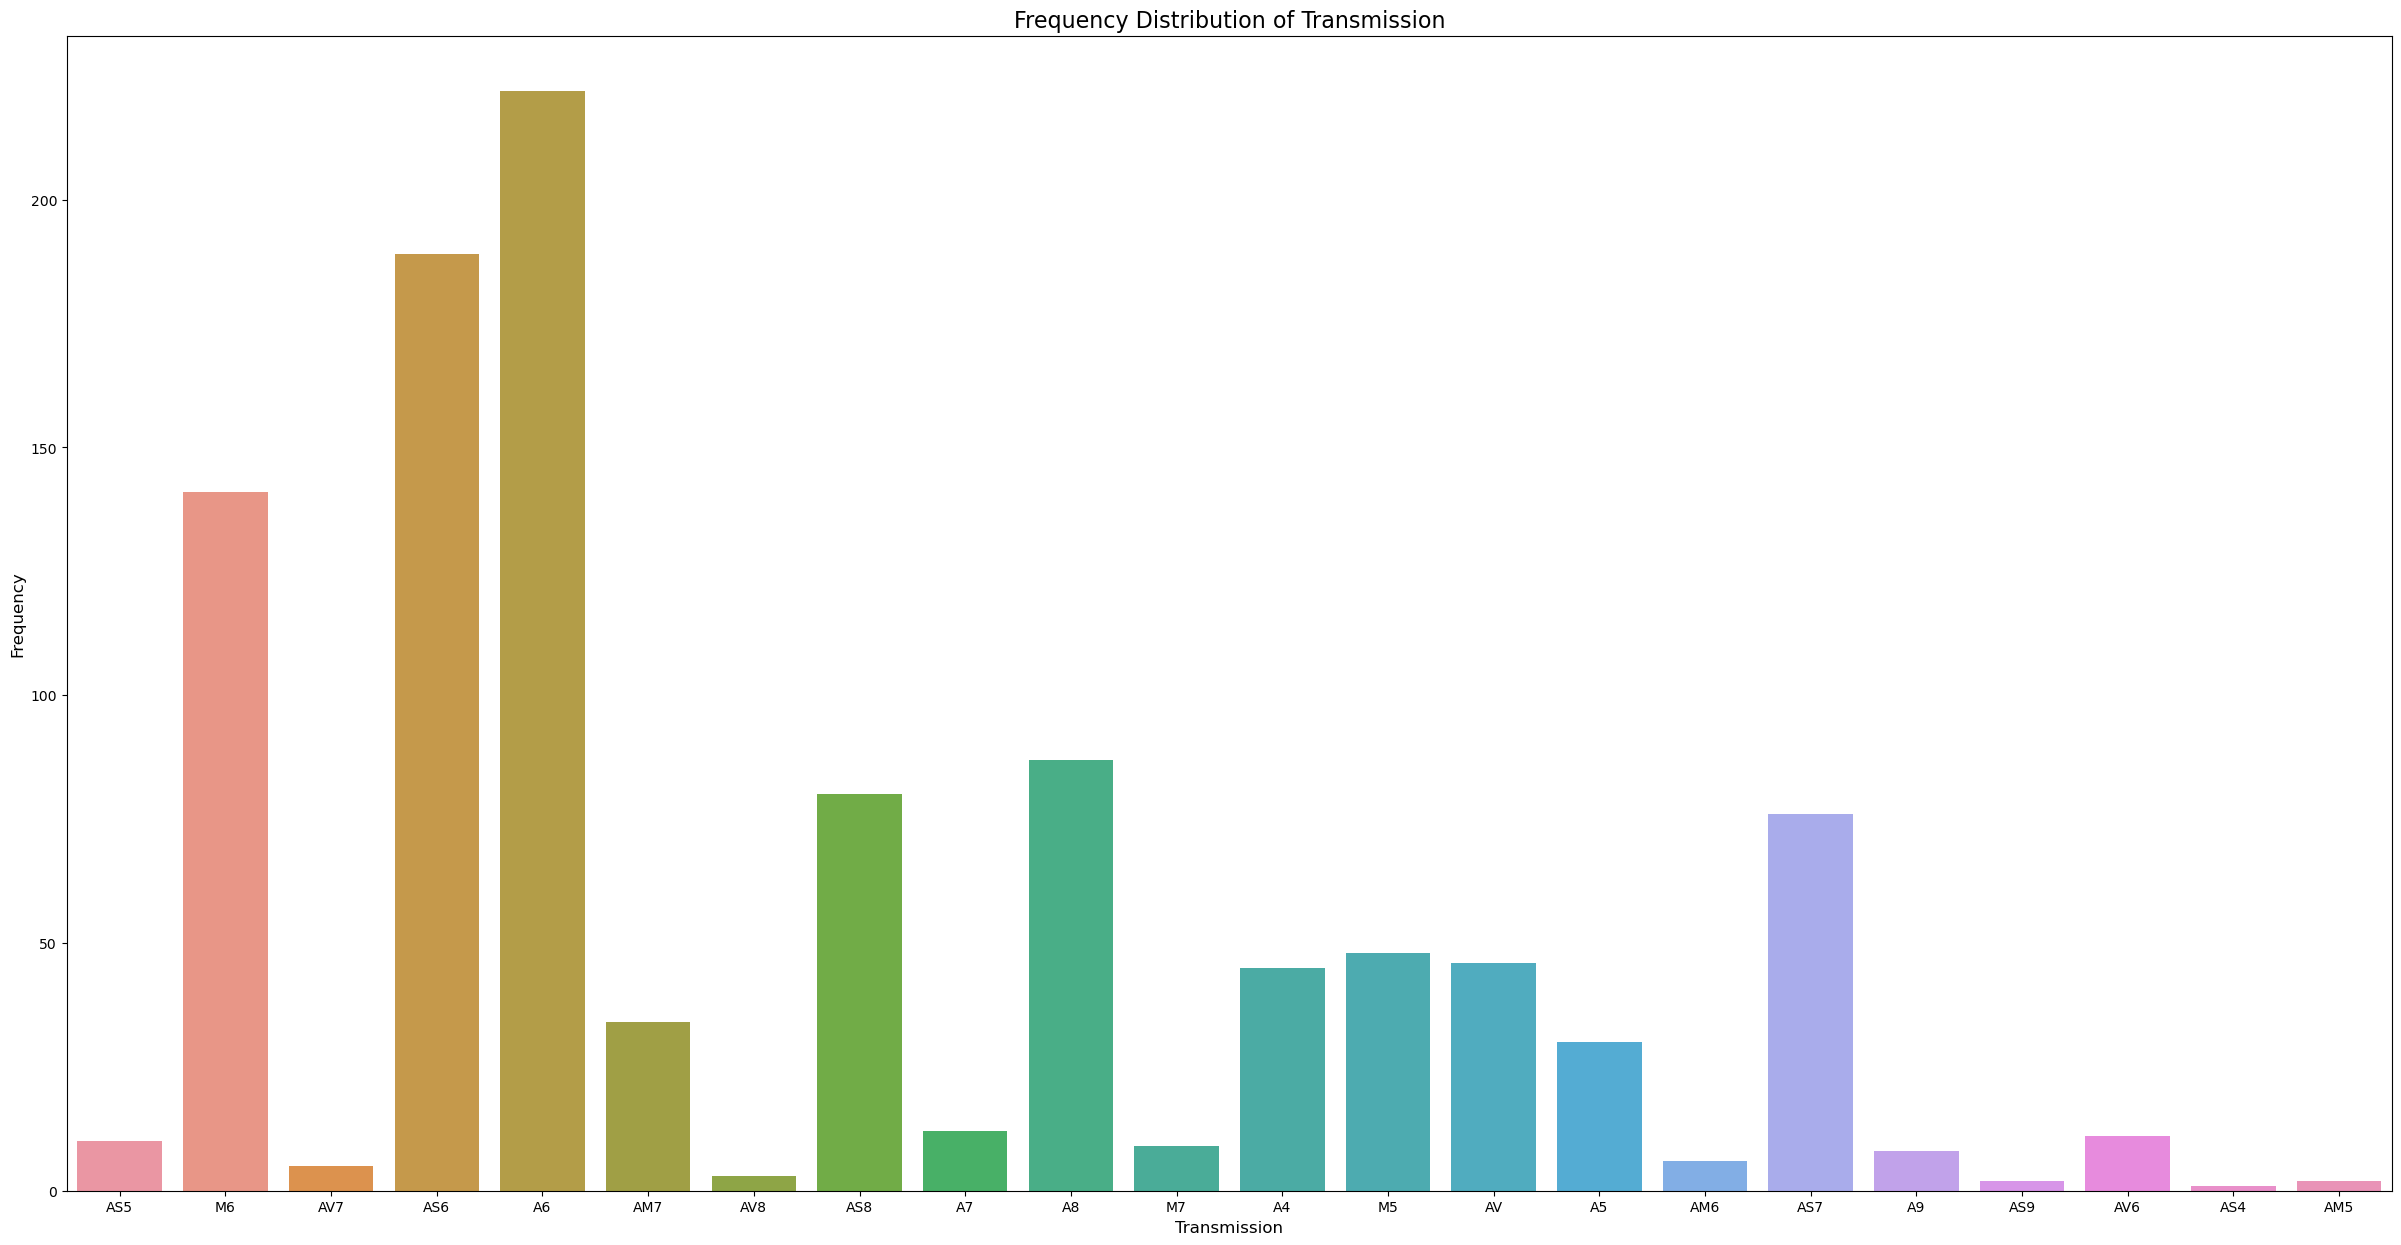

In [29]:
plt.figure(figsize=(30,15));
sns.countplot(x='TRANSMISSION', data=df)
plt.title('Frequency Distribution of Transmission', fontsize=16)
plt.xlabel('Transmission', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [30]:
co2_transmission = df.groupby('TRANSMISSION')["CO2EMISSIONS"].mean()
co2_transmission

TRANSMISSION
A4     329.022222
A5     298.900000
A6     263.054054
A7     314.000000
A8     265.643678
A9     242.625000
AM5    147.000000
AM6    232.833333
AM7    267.852941
AS4    228.000000
AS5    261.100000
AS6    249.666667
AS7    274.210526
AS8    290.212500
AS9    225.000000
AV     183.565217
AV6    193.272727
AV7    160.200000
AV8    213.000000
M5     199.354167
M6     235.716312
M7     251.000000
Name: CO2EMISSIONS, dtype: float64

Text(0, 0.5, 'CO2 Emissions(g/km)')

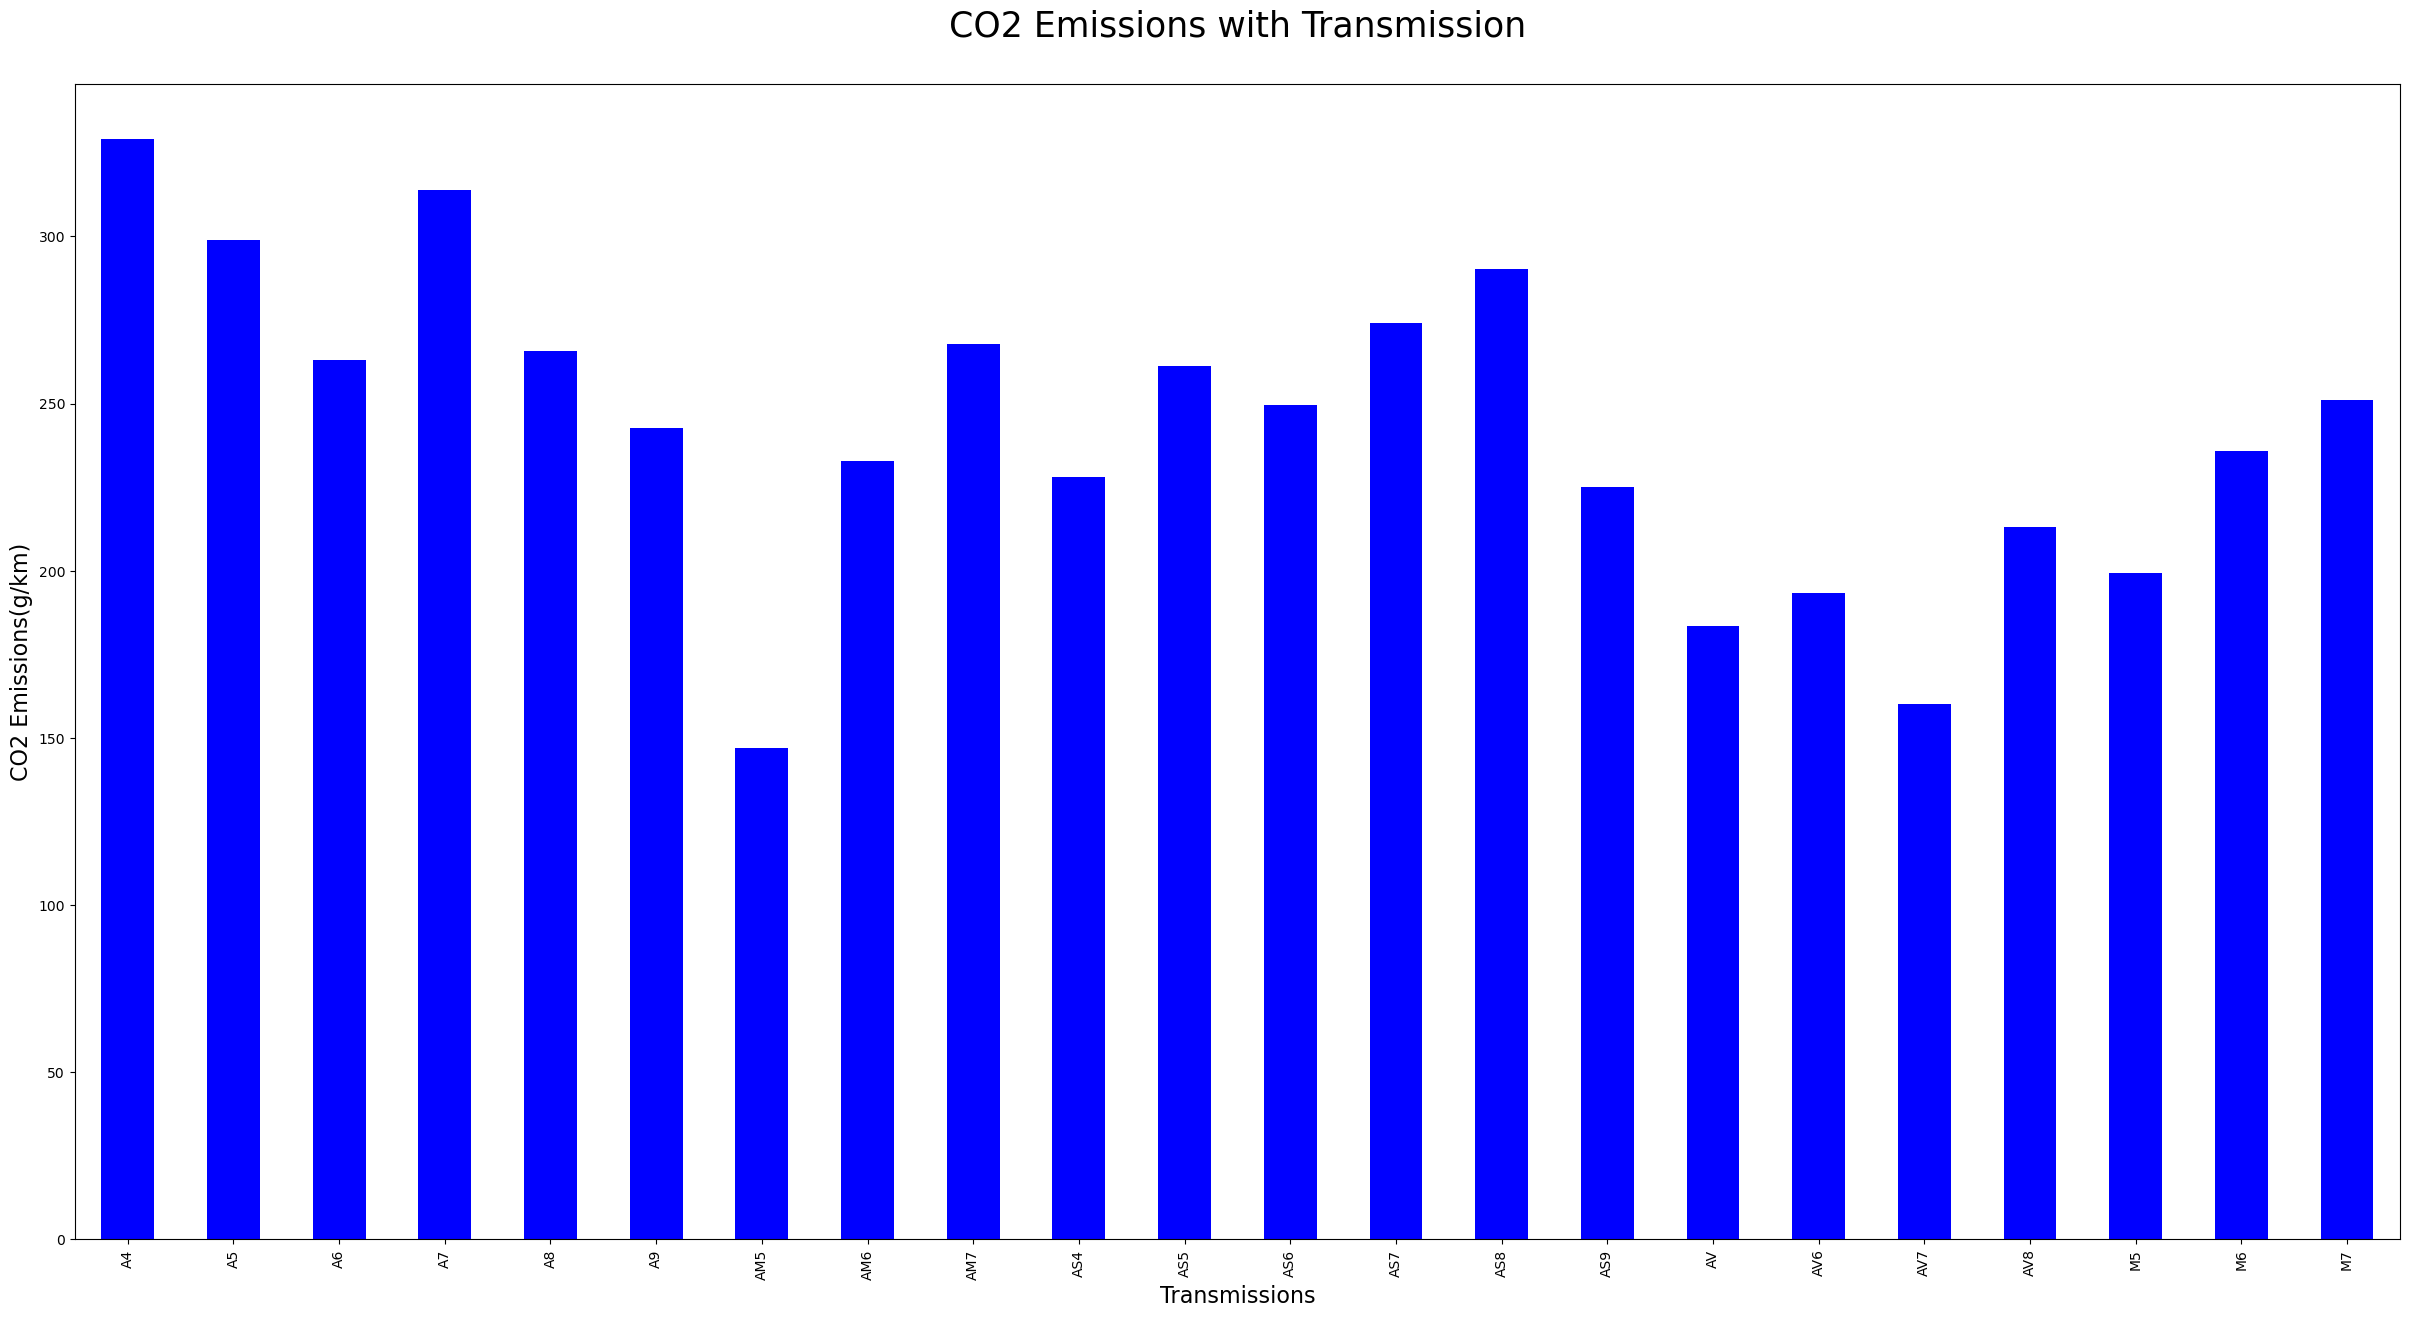

In [31]:
plt.figure(figsize=(30,15));
co2_transmission.plot(kind = 'bar',color = 'b')
plt.title('CO2 Emissions with Transmission\n', fontsize=25)
plt.xlabel('Transmissions', fontsize=16)
plt.ylabel('CO2 Emissions(g/km)', fontsize=16)

The type of transmission can impact CO2 emissions. Generally, automatic transmissions tend to have higher CO2 emissions compared to manual transmissions. This is because automatic transmissions have more moving parts and are generally less efficient than manual transmissions

### Conclusions

The median engine size is 3.0 liters.

The average Fuel consumption for each Fuel types are :
    
E = 18.19

Z = 11.68

X = 10.48

D = 8.44

The correlation between fuel consumption and CO2 emissions is strong, with a coefficient of 0.89.

MID-SIZE, COMPACT, SUV - SMALL vehicles are the most frequent ones on Canadian roads.

The COMPACT vehicles have lower average CO2 emission (216.71) compared to MID-SIZE vehicles (226.48)

The average CO2 emissions for all cars in the dataset is 256.23 g/km, with maximum 488 g/km and minimum 108 g/km.

The average CO2 emissions for vehicles with an engine size of 2.0 liters or smaller is 194.7 g/Km

The boxplot shows that there are outliers for CO2 emissions.

There is a strong positive correlation between engine size and CO2 emissions, indicating that cars with larger engines tend to emit more CO2 than those with smaller engines.

The median engine size of the vehicles in the dataset is 3.4 liters, suggesting that this is a popular engine size among consumers.

The frequency distribution of transmission types shows that the majority of cars in the dataset have an Automatic with select shift transmission.

Most vehicles use D fuel (Regular gasoline) and it has a low CO2 emission rate.

E fuel (Ethanol) has the highest CO2 emission rate.

Carbon dioxide emissions are directly related to the amount of fuel consumed, and this relationship varies from fuel to fuel.

Vehicles with smaller cylinders have low CO2 emission rates.This is because the amount of fuel burned in the engine is proportional to the number of cylinders, and therefore smaller engines burn less fuel.

### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
X = df[['ENGINESIZE']]
y = df['CO2EMISSIONS']
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2)

### Linear Regression

In [33]:
#Step:1 importing library
from sklearn import linear_model

# Step:2 Object creation 
lin_reg = linear_model.LinearRegression()

# Step:3 fitting traing data
lin_reg.fit (X_train , y_train)

# The coefficients
print ('Coefficients: ', lin_reg.coef_)
print ('Intercept: ',lin_reg.intercept_)

Coefficients:  [39.24478194]
Intercept:  124.65525663850201


### Evaluation Metrics

    1) Mean absolute error (MAE)
    
    2) Residual sum of squares (MSE)

    3) R^2 - Score

In [34]:
from sklearn.metrics import r2_score

# Prediction on test data
y_test_hat = lin_reg.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test_hat, y_test))
print("Accuracy: %.2f" % lin_reg.score(X_train,y_train))

Mean absolute error: 24.84
Residual sum of squares (MSE): 1054.98
R2-score: 0.65
Accuracy: 0.77


### MULTIPLE REGRESSION

In [35]:
X1 = df[['ENGINESIZE','FUELCONSUMPTION_COMB']]
#Train_x , Test_x , Train_y , Test_y = train_test_split(X,y,test_size = 0.2)
X_train1 , X_test1 , y_train1 , y_test1 = train_test_split(X1, y, test_size=0.2)

In [36]:
# Object creation
Mul_reg = linear_model.LinearRegression()

# fitting traing data
Mul_reg.fit (X_train1 , y_train1)

# The coefficients
print ('Coefficients: ', Mul_reg.coef_[0])
print ('Intercept: ',Mul_reg.intercept_)

Coefficients:  19.945755540788028
Intercept:  79.37899976446784


### Evaluation Metrics

    1) Mean absolute error (MAE)

    2) Residual sum of squares (MSE)

    3) R^2 - Score

In [37]:
y_test1_hat = Mul_reg.predict(X_test1)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test1_hat - y_test1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test1_hat - y_test1) ** 2))
print("R2-score: %.2f" % r2_score(y_test1_hat,y_test1))
print("Accuracy: %.2f" % Mul_reg.score(X_train1,y_train1))

Mean absolute error: 18.26
Residual sum of squares (MSE): 637.82
R2-score: 0.81
Accuracy: 0.86


### Recommendations

Encourage consumers to choose vehicles with smaller engine sizes, which emit less CO2 and have lower average fuel consumption. Car manufacturers could be encourage to produce more smaller engine size vehicles, and car dealerships could offer discounts or rebates for these types of vehicles.

Increase public awareness about the impact of different types of fuel on CO2 emissions. Ethanol fuel emits the most CO2, so consumers should be encouraged to avoid purchasing vehicles that run on this type of fuel. Instead, consumers could be encouraged to choose vehicles that run on fuels with lower CO2 emissions, such as diesel or regular gasoline.

Promote the use of public transportation, carpooling, and alternative forms of transportation, such as biking or walking. This would reduce the number of vehicles on the road, which would in turn reduce overall CO2 emissions.

Encourage the development and use of renewable energy sources, such as wind and solar power, to power electric vehicles. This would reduce CO2 emissions from transportation.

Provide tax incentives for consumers who purchase fuel-efficient vehicles, such as hybrid or electric vehicles. This would encourage consumers to choose vehicles that emit less CO2 and have lower average fuel consumption.

Encourage car manufacturers to invest in research and development of alternative fuel technologies that emit lower levels of CO2. This could include hydrogen fuel cells or biofuels.

Increase public awareness about the importance of regular vehicle maintenance to ensure that cars are running at peak efficiency. This would help to reduce average fuel consumption and CO2 emissions.

Increase public awareness about the impact of driving habits on fuel consumption and CO2 emissions. Encourage drivers to adopt eco-friendly driving habits, such as avoiding rapid acceleration and braking, maintaining a consistent speed, and avoiding idling.

Encourage car manufacturers to produce more vehicles with manual transmissions, which tend to have lower average fuel consumption and emit less CO2 than automatic transmissions.